In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
#import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, how="left", on=['Mouse ID', 'Mouse ID'])

# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [6]:
df["Mouse ID"].value_counts()

g989    13
a203    10
o926    10
f545    10
k382    10
        ..
f932     1
l872     1
d133     1
n482     1
b447     1
Name: Mouse ID, Length: 249, dtype: int64

In [7]:
df["Mouse ID"].nunique()

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_time = df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_time

array(['g989'], dtype=object)

In [9]:
#test
g989 = df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Timepoint'].sum()
g989

50

In [10]:
# Optional: Get all the data for the duplicate mouse ID.
g989_df = df[df['Mouse ID']=='g989']
g989_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep='first')
clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Checking the number of mice in the clean DataFrame.
clean["Mouse ID"].nunique()

249

# Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Identify the diferrent Drug Regimen along with the total tumer volume for each using .groupby
regimen_grouped = clean.groupby(["Drug Regimen"])
regimen_grouped

#create a variable to capture the total tumor volume for each regimen
tumor_volume = regimen_grouped["Tumor Volume (mm3)"].sum()

#create computation for the mean of each regimen
regimen_mean = regimen_grouped["Tumor Volume (mm3)"].mean()

#Create computation for the median of each regimen
regimen_median = regimen_grouped["Tumor Volume (mm3)"].median()

#Create computation for the variance of each regimen
regimen_variance = regimen_grouped["Tumor Volume (mm3)"].var()

#create computation for the standard deviation of each regimen
regimen_std = regimen_grouped["Tumor Volume (mm3)"].std()

#create computation for the SEM
regimen_sem = regimen_grouped["Tumor Volume (mm3)"].sem()

In [15]:
summary_stats = pd.DataFrame({"Total Tumor Volume": tumor_volume, "Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})

#Format cells in Dataframe
summary_stats["Total Tumor Volume"] = summary_stats["Total Tumor Volume"].astype(float).map("{:,.2f}".format)

summary_stats["Mean"] = summary_stats["Mean"].astype(float).map("{:.2f}".format)

summary_stats["Median"] = summary_stats["Median"].astype(float).map("{:,.2f}".format)

summary_stats["Variance"] = summary_stats["Variance"].astype(float).map("{:,.2f}".format)

summary_stats["Standard Deviation"] = summary_stats["Standard Deviation"].astype(float).map("{:,.2f}".format)

summary_stats["SEM"] = summary_stats["SEM"].astype(float).map("{:,.2f}".format)

summary_stats

,Total Tumor Volume,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,"9,355.42",40.68,41.56,24.95,4.99,0.33
Ceftamin,"9,361.23",52.59,51.78,39.29,6.27,0.47
Infubinol,"9,413.49",52.88,51.82,43.13,6.57,0.49
Ketapril,"10,384.30",55.24,53.70,68.55,8.28,0.60
Naftisol,"10,105.67",54.33,52.51,66.17,8.13,0.60
Placebo,"9,780.08",54.03,52.29,61.17,7.82,0.58
Propriva,"8,173.38",52.39,50.91,43.14,6.57,0.53
Ramicane,"9,169.42",40.22,40.67,23.49,4.85,0.32
Stelasyn,"9,816.20",54.23,52.43,59.45,7.71,0.57


# Bar and Pie Charts

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#clean


In [17]:
clean2 = clean['Drug Regimen'].value_counts()
clean2

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

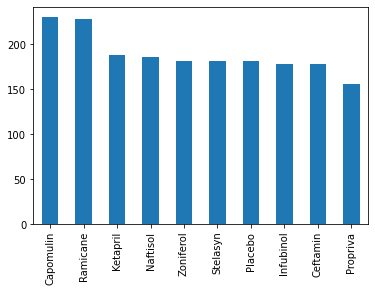

In [18]:
clean2.plot(kind='bar')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

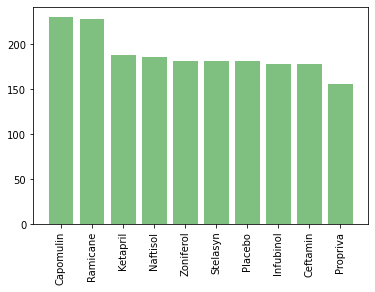

In [19]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(clean2.index, clean2.values, color='g', alpha=0.5, align="center")
plt.xticks(rotation=90)

In [20]:
plt.savefig('mouse_bar.png')

<Figure size 432x288 with 0 Axes>

# Generate a pie plot showing the distribution of female versus male mice

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = df.drop_duplicates(subset=['Mouse ID'], keep='first')

#Group by "Mouse ID" and "Sex" to find the unique number of male vs female
groupby_gender = gender.groupby(["Mouse ID","Sex"])
groupby_gender

mouse_gender_df = pd.DataFrame(groupby_gender.size())

#Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

#create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

#format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"].map('{:,.2f}'.format).astype(float)

#gender_df
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.8
Male,125,50.2


In [22]:
clean['Sex'].value_counts()

Male      958
Female    930
Name: Sex, dtype: int64

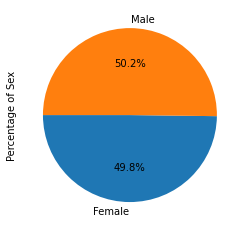

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#mouse_gender
mouse_gender['Percentage of Sex'].plot(kind='pie',autopct='%1.1f%%',startangle=180)

(-1.2067595127126864,
 1.1059309614378074,
 -1.1016881556114846,
 1.100738623826109)

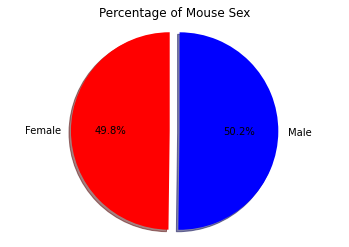

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#mouse_gender
plt.title("Percentage of Mouse Sex")
explode = (0.1, 0,)
labels = ('Female','Male')
colors = ('red','blue')
#explode=explode, labels=labels, colors=colors
plt.pie(mouse_gender['Percentage of Sex'].values, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")

In [25]:
plt.savefig('mouse_sex.png')

<Figure size 432x288 with 0 Axes>

# Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# DF Using : clean
# Start by getting the last (greatest) timepoint for each mouse
cap = clean.loc[clean["Drug Regimen"] == "Capomulin",:]
ram = clean.loc[clean["Drug Regimen"] == "Ramicane", :]
inf = clean.loc[clean["Drug Regimen"] == "Infubinol", :]
cef = clean.loc[clean["Drug Regimen"] == "Ceftamin", :]
cap
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#clean['Tumor Volume (mm3) at last Timepoint'] = last.loc['Mouse ID','Timepoint']
#last

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [27]:
# Capomulin # Merge this group df with the original dataframe to get the tumor volume at the last timepoint 
caplast = pd.DataFrame(cap.groupby('Mouse ID').max()['Timepoint'])
caplastmerge = pd.merge(caplast, clean, on=("Mouse ID","Timepoint"),how="left")
caplastmerge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [28]:
# Capomulin # Determine outliers using upper and lower bounds
tumors_cap = caplastmerge["Tumor Volume (mm3)"]

quartiles = tumors_cap.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


In [29]:
# Ramicane # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ramlast = pd.DataFrame(ram.groupby('Mouse ID').max()['Timepoint'])
ramlastmerge = pd.merge(ramlast, clean, on=("Mouse ID","Timepoint"),how="left")
ramlastmerge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
5,c758,45,Ramicane,Male,9,17,33.397653,1
6,d251,45,Ramicane,Female,8,19,37.311236,2
7,e662,45,Ramicane,Male,8,24,40.659006,2
8,g791,45,Ramicane,Male,11,16,29.128472,1
9,i177,45,Ramicane,Male,10,18,33.562402,3


In [30]:
#Ramicane  # Determine outliers using upper and lower bounds
tumors_ram = ramlastmerge["Tumor Volume (mm3)"]

quartiles2 = tumors_ram.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Ramicane potential outliers could be values below {lower_bound2} and above {upper_bound2} could be outliers.")

Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.


In [31]:
# Infubinol # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
inflast = pd.DataFrame(inf.groupby('Mouse ID').max()['Timepoint'])
inflastmerge = pd.merge(inflast, clean, on=("Mouse ID","Timepoint"),how="left")
inflastmerge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2
5,c326,5,Infubinol,Female,18,25,36.321346,0
6,c895,30,Infubinol,Female,7,29,60.969711,2
7,e476,45,Infubinol,Male,23,26,62.435404,1
8,f345,45,Infubinol,Male,23,26,60.918767,1
9,i386,40,Infubinol,Female,23,29,67.289621,4


In [32]:
# Infubinol  # Determine outliers using upper and lower bounds
tumors_inf = inflastmerge["Tumor Volume (mm3)"]

quartiles3 = tumors_inf.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3

lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"Infubinol potential outliers could be values below {lower_bound3} and above {upper_bound3} could be outliers.")

Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.


In [33]:
# Ceftamin # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ceftlast = pd.DataFrame(cef.groupby('Mouse ID').max()['Timepoint'])
ceftlastmerge = pd.merge(ceftlast, clean, on=("Mouse ID","Timepoint"),how="left")
ceftlastmerge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
5,h531,5,Ceftamin,Male,5,27,47.784682,0
6,j296,45,Ceftamin,Female,24,30,61.849023,3
7,k210,45,Ceftamin,Male,15,28,68.923185,3
8,l471,45,Ceftamin,Female,7,28,67.748662,1
9,l490,30,Ceftamin,Male,24,26,57.918381,3


In [34]:
# Ceftamin # Determine outliers using upper and lower bounds
tumors_cef = ceftlastmerge["Tumor Volume (mm3)"]

quartiles4 = tumors_cef.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4

lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Ceftamin potential outliers could be values below {lower_bound4} and above {upper_bound4} could be outliers.")

Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


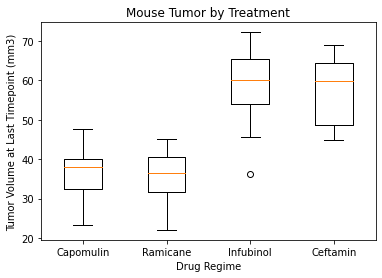

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Regimes = [tumors_cap, tumors_ram, tumors_inf, tumors_cef]
labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

fig1, ax1 = plt.subplots()
ax1.set_title('Mouse Tumor by Treatment')
ax1.set_ylabel('Tumor Volume at Last Timepoint (mm3)')
ax1.set_xlabel('Drug Regime')
ax1.boxplot(Regimes)
plt.xticks([1, 2, 3,4], labels)
plt.show()

In [36]:
plt.savefig('mouse_boxplot_treatments.png')

<Figure size 432x288 with 0 Axes>

# Line and Scatter Plots

In [37]:
# Mouse ID = b128
# Data Frame = cap
b128 = cap.loc[cap["Mouse ID"] == "b128",:]
b128

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


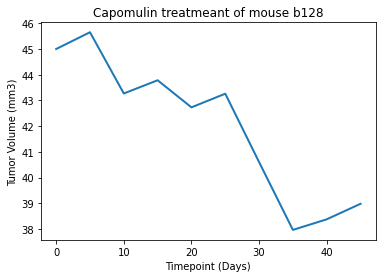

In [38]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Mouse ID = b128
b128 = cap.loc[cap["Mouse ID"] == "b128",:]
x_axis = b128["Timepoint"]
size = b128["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse b128')
plt.plot(x_axis, size,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')


plt.show()

In [39]:
plt.savefig('mouse_b128_Size.png')

<Figure size 432x288 with 0 Axes>

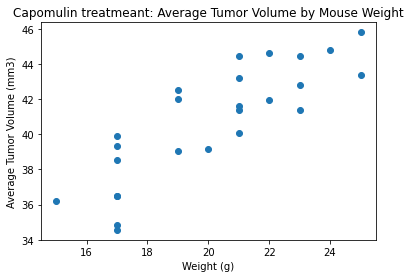

<Figure size 432x288 with 0 Axes>

In [49]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# DataFrame = cap
cap_weight_avg = cap.groupby(['Mouse ID']).mean()
plt.scatter(cap_weight_avg['Weight (g)'],cap_weight_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin treatmeant: Average Tumor Volume by Mouse Weight')
plt.show()
plt.savefig('mouse_Scatter_Weight.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)

In [41]:
plt.savefig('mouse_Scatter_Weight.png')

<Figure size 432x288 with 0 Axes>

# Correlation and Regression

In [42]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [43]:
# correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(cap_weight_avg['Weight (g)'],cap_weight_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

The correlation between mouse weight and average tumor volume is 0.84


In [44]:
# linear regression model for mouse weight and average tumor volume for the Capomulin regimen
regression = st.linregress(cap_weight_avg['Weight (g)'],cap_weight_avg['Tumor Volume (mm3)'])
regression

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

In [45]:
slope=0.9544396890241045
intercept=21.552160532685015

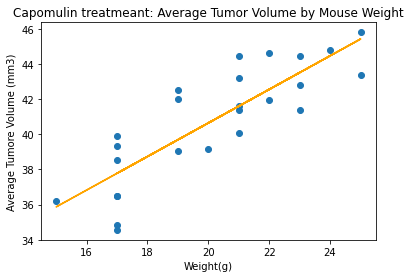

<Figure size 432x288 with 0 Axes>

In [50]:
y_values = cap_weight_avg['Weight (g)']*slope+intercept
plt.scatter(cap_weight_avg['Weight (g)'],cap_weight_avg['Tumor Volume (mm3)'])
plt.plot(cap_weight_avg['Weight (g)'],y_values,color="orange")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.title('Capomulin treatmeant: Average Tumor Volume by Mouse Weight')

plt.show()

plt.savefig('mouse_Scatter_regression.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)